In [1]:
import pandas as pd
import os
import numpy as np
import random 
import getpass
import math
import re
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from collections import Counter
from decimal import getcontext
from datetime import date
from datetime import datetime as dt
from datetime import timedelta
from datetime import datetime
from pandas.tseries.offsets import BDay

In [2]:
filepath = "C:/Users/janew/Desktop/PortfolioProjects/Quantium Project/"
transactionData = pd.read_excel(filepath+"QVI_transaction_data.xlsx")
customerData = pd.read_csv(filepath+"QVI_purchase_behaviour.csv")

In [3]:
'''
Examine Transaction Data, including the following:
    1. change DATE format from int64 to datetime format
    2. perform basic text analysis: remove special characters
    3. examine product names: remove products that are not chips
    4. examine product quantity: remove those who purchased quantity greater than 200 in one transaction
    5. check missing dates: 2018-12-25 is missing due to Christmas shops closure
    6. check pack size or weight in each product, all products have reasonable pack sizes

Perform summary statistics table

'''

'\nExamine Transaction Data, including the following:\n    1. change DATE format from int64 to datetime format\n    2. perform basic text analysis: remove special characters\n    3. examine product names: remove products that are not chips\n    4. examine product quantity: remove those who purchased quantity greater than 200 in one transaction\n    5. check missing dates: 2018-12-25 is missing due to Christmas shops closure\n    6. check pack size or weight in each product, all products have reasonable pack sizes\n\nPerform summary statistics table\n\n'

In [4]:
# create a function to convert DATE format from int64 to datetime format
def formatDateInCsv(dataframe):
    dataframe['DATE'] = pd.to_datetime(dataframe['DATE'], unit='D', origin='1899-12-30', errors='coerce')

formatDateInCsv(transactionData)
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [5]:
# perform basic text analysis to remove special characters 
transactionData['PROD_NAME'] = transactionData['PROD_NAME'].map(lambda x: re.sub(r'\W+', '', x))

In [6]:
# remove products that are not chips
Prod_name_pt = transactionData.groupby(['PROD_NAME'])['DATE'].count().reset_index()
Prod_name_pt.rename(columns={'DATE': 'COUNT'}, inplace=True)
Prod_name_pt_clean = transactionData[~transactionData['PROD_NAME'].str.contains('Salsa')]

In [7]:
# There are no nulls in the columns but product quantity appears to have an outlier which we should investigate
# further. Let’s investigate further the case where 200 packets of chips are bought in one transaction.
# remove outliers: production quantity greater than 200. 
transactionData_clean = Prod_name_pt_clean[Prod_name_pt_clean['PROD_QTY']<200]

In [8]:
# check if there is any missing dates
transactionData_clean['DATE'].nunique()
# totally 364 different dates, one date is missing
set(transactionData_clean['DATE']) 

# find the one missing date which is 2018-12-25, which makes sense because all shops closed on Christmas holiday. 
k = pd.date_range(start="2018-07-01", end="2019-06-30").difference(transactionData_clean.DATE)

In [9]:
# check if pack size is reasonable by extracting the last a few digits of PROD_NAME
transactionData_clean['PACK_SIZE'] = transactionData_clean["PROD_NAME"].str.extract("(\d*\.?\d+)", expand=True)
transactionData_clean

<ipython-input-9-b231b4cc8862>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionData_clean['PACK_SIZE'] = transactionData_clean["PROD_NAME"].str.extract("(\d*\.?\d+)", expand=True)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,NaturalChipCompnySeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCsNachoCheese175g,3,6.3,175
2,2019-05-20,1,1343,383,61,SmithsCrinkleCutChipsChicken170g,2,2.9,170
3,2018-08-17,2,2373,974,69,SmithsChipThinlySCreamOnion175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,KettleTortillaChpsHnyJlpnoChili150g,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,KettleSweetChilliAndSourCream175g,2,10.8,175
264832,2018-08-13,272,272358,270154,74,TostitosSplashOfLime175g,1,4.4,175
264833,2018-11-06,272,272379,270187,51,DoritosMexicana170g,2,8.8,170
264834,2018-12-27,272,272379,270188,42,DoritosCornChipMexicanJalapeno150g,2,7.8,150


In [10]:
# the largest pack size is 380g and the smallest size is 70g, which are reasonable. 
pack_size_pt = transactionData_clean.groupby(['PACK_SIZE'])['DATE'].count().reset_index()
pack_size_pt.rename(columns={'DATE': 'COUNT'}, inplace=True)
pack_size_pt

,PACK_SIZE,COUNT
0,110,22387
1,125,1454
2,134,25102
3,135,3257
4,150,40203
5,160,2970
6,165,15297
7,170,19983
8,175,66390
9,180,1468


In [11]:
# re-examine transaction data
transactionData_clean.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [12]:
# perform summary statistics table
transactionData_clean.corr()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,1.000000,0.949194,0.997462,0.001897,0.005004,0.001899
LYLTY_CARD_NBR,0.949194,1.000000,0.953411,0.001338,0.002316,0.001390
TXN_ID,0.997462,0.953411,1.000000,0.002139,0.005156,0.002253
PROD_NBR,0.001897,0.001338,0.002139,1.000000,-0.002287,-0.173297
PROD_QTY,0.005004,0.002316,0.005156,-0.002287,1.000000,0.538241
TOT_SALES,0.001899,0.001390,0.002253,-0.173297,0.538241,1.000000


In [13]:
'''
Examine Customer Data, including the following:
    1. Examine LIFESTAGE and PREMIUM_CUSTOMER columns

'''

'\nExamine Customer Data, including the following:\n    1. Examine LIFESTAGE and PREMIUM_CUSTOMER columns\n\n'

In [14]:
customerData

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [15]:
# examine the values of LIFESTAGE column
lifestage_pt = customerData.groupby(['LIFESTAGE'])['LYLTY_CARD_NBR'].count().reset_index()
lifestage_pt.rename(columns={'LYLTY_CARD_NBR': 'COUNT'}, inplace=True)
lifestage_pt

,LIFESTAGE,COUNT
0,MIDAGE SINGLES/COUPLES,7275
1,NEW FAMILIES,2549
2,OLDER FAMILIES,9780
3,OLDER SINGLES/COUPLES,14609
4,RETIREES,14805
5,YOUNG FAMILIES,9178
6,YOUNG SINGLES/COUPLES,14441


In [16]:
# examine the values of PREMIUM_CUSTOMER column
premium_pt = customerData.groupby(['PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().reset_index()
premium_pt.rename(columns={'LYLTY_CARD_NBR': 'COUNT'}, inplace=True)
premium_pt

,PREMIUM_CUSTOMER,COUNT
0,Budget,24470
1,Mainstream,29245
2,Premium,18922


In [17]:
# No issue with LIFESTAGE and PREMIUM_CUSTOMER columns
# Join TRANSACTION and CUSTOMER tables together
# As the number of rows in data is the same as that of transactionData, so no duplicates were created.
joint_df = transactionData.merge(customerData, how = 'left')
joint_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,NaturalChipCompnySeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCsNachoCheese175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,SmithsCrinkleCutChipsChicken170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,SmithsChipThinlySCreamOnion175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,KettleTortillaChpsHnyJlpnoChili150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,KettleSweetChilliAndSourCream175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,TostitosSplashOfLime175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,DoritosMexicana170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,DoritosCornChipMexicanJalapeno150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [18]:
# after left join, check if the newly added columns have null values
joint_df.isnull().values.any()

False

In [19]:
'''
Data Analysis on customer segments and define metrics of interest to the client
    1. who spends the most on chips (total sales), 
    2. how many customers are in each segment
    3. how many chips are bought per customer by segment
    4. what's the average chip price by customer segment
    
'''

"\nData Analysis on customer segments and define metrics of interest to the client\n    1. who spends the most on chips (total sales), \n    2. how many customers are in each segment\n    3. how many chips are bought per customer by segment\n    4. what's the average chip price by customer segment\n    \n"

In [20]:
# calculate TOTAL SALES by LIFESTAGE and PREMIUM_CUSTOMER 
# describe which customer segment contribute most to chip sales
lifestage_df = joint_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
lifestage_df['%'] = round(100 * lifestage_df['TOT_SALES']  / lifestage_df['TOT_SALES'].sum(), 2)
lifestage_df = lifestage_df.drop(columns = ['TOT_SALES'])
lifestage_df

,LIFESTAGE,PREMIUM_CUSTOMER,%
0,MIDAGE SINGLES/COUPLES,Budget,1.84
1,MIDAGE SINGLES/COUPLES,Mainstream,4.69
2,MIDAGE SINGLES/COUPLES,Premium,3.02
3,NEW FAMILIES,Budget,1.13
4,NEW FAMILIES,Mainstream,0.88
5,NEW FAMILIES,Premium,0.59
6,OLDER FAMILIES,Budget,8.70
7,OLDER FAMILIES,Mainstream,5.35
8,OLDER FAMILIES,Premium,4.24
9,OLDER SINGLES/COUPLES,Budget,7.07


<AxesSubplot:title={'center':'Total Sales by Customer Segments'}, xlabel='LIFESTAGE'>

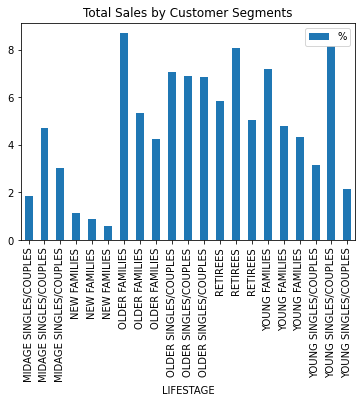

In [21]:
lifestage_df.plot.bar(x='LIFESTAGE', stacked=True, title='Total Sales by Customer Segments')

# Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

In [22]:
lifestage_df = joint_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].sum().reset_index()
lifestage_df['%'] = round(100 * lifestage_df['TOT_SALES']  / lifestage_df['TOT_SALES'].sum(), 2)
lifestage_df
# There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. 
# This contributes to there being more sales to these customer segments but this is not a major driver for the Budget-Older families segment.

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,%
0,Budget,MIDAGE SINGLES/COUPLES,35514.80,1.84
1,Budget,NEW FAMILIES,21928.45,1.13
2,Budget,OLDER FAMILIES,168363.25,8.70
3,Budget,OLDER SINGLES/COUPLES,136769.80,7.07
4,Budget,RETIREES,113147.80,5.85
5,Budget,YOUNG FAMILIES,139345.85,7.20
6,Budget,YOUNG SINGLES/COUPLES,61141.60,3.16
7,Mainstream,MIDAGE SINGLES/COUPLES,90803.85,4.69
8,Mainstream,NEW FAMILIES,17013.90,0.88
9,Mainstream,OLDER FAMILIES,103445.55,5.35


In [23]:
# Number of units of chips being bought per customer
# note: perform 'count' aggregate function on LYLTY_CARD_NBR, and perform 'sum' aggregate function on PROD_QTY
avg_units_df_cust = joint_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().reset_index()
avg_units_df_cust

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,5020
1,MIDAGE SINGLES/COUPLES,Mainstream,11874
2,MIDAGE SINGLES/COUPLES,Premium,8216
3,NEW FAMILIES,Budget,3005
4,NEW FAMILIES,Mainstream,2325
5,NEW FAMILIES,Premium,1589
6,OLDER FAMILIES,Budget,23160
7,OLDER FAMILIES,Mainstream,14244
8,OLDER FAMILIES,Premium,11192
9,OLDER SINGLES/COUPLES,Budget,18407


In [24]:
avg_units_df_qty = joint_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
avg_units_df_qty

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,9496
1,MIDAGE SINGLES/COUPLES,Mainstream,22699
2,MIDAGE SINGLES/COUPLES,Premium,15526
3,NEW FAMILIES,Budget,5571
4,NEW FAMILIES,Mainstream,4319
5,NEW FAMILIES,Premium,2957
6,OLDER FAMILIES,Budget,45065
7,OLDER FAMILIES,Mainstream,27756
8,OLDER FAMILIES,Premium,22171
9,OLDER SINGLES/COUPLES,Budget,35220


In [25]:
# join two sub-df on LIFESTAGE
avg_units_df = avg_units_df_cust.merge(avg_units_df_qty, on = ['LIFESTAGE','PREMIUM_CUSTOMER'])
avg_units_df

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,5020,9496
1,MIDAGE SINGLES/COUPLES,Mainstream,11874,22699
2,MIDAGE SINGLES/COUPLES,Premium,8216,15526
3,NEW FAMILIES,Budget,3005,5571
4,NEW FAMILIES,Mainstream,2325,4319
5,NEW FAMILIES,Premium,1589,2957
6,OLDER FAMILIES,Budget,23160,45065
7,OLDER FAMILIES,Mainstream,14244,27756
8,OLDER FAMILIES,Premium,11192,22171
9,OLDER SINGLES/COUPLES,Budget,18407,35220


In [26]:
avg_units_df['avg units/customer'] = round(avg_units_df['PROD_QTY']/avg_units_df['LYLTY_CARD_NBR'], 2)
avg_units_df.sort_values('LIFESTAGE')
# older families and younger families in general buy more chips per customer

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,PROD_QTY,avg units/customer
0,MIDAGE SINGLES/COUPLES,Budget,5020,9496,1.89
1,MIDAGE SINGLES/COUPLES,Mainstream,11874,22699,1.91
2,MIDAGE SINGLES/COUPLES,Premium,8216,15526,1.89
3,NEW FAMILIES,Budget,3005,5571,1.85
4,NEW FAMILIES,Mainstream,2325,4319,1.86
5,NEW FAMILIES,Premium,1589,2957,1.86
6,OLDER FAMILIES,Budget,23160,45065,1.95
7,OLDER FAMILIES,Mainstream,14244,27756,1.95
8,OLDER FAMILIES,Premium,11192,22171,1.98
11,OLDER SINGLES/COUPLES,Premium,17754,33986,1.91


In [27]:
# Calculate the average chip price by customer segment
avg_price = joint_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES','PROD_QTY'].sum().reset_index()

avg_price['avg price/unit'] = round(avg_price['TOT_SALES']/avg_price['PROD_QTY'], 2)
avg_price.sort_values('avg price/unit', ascending = False)

# Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts.
# since the difference is not large, can check if this difference is statistically significant. 

<ipython-input-27-965aa62b29d4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_price = joint_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES','PROD_QTY'].sum().reset_index()


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,avg price/unit
19,YOUNG SINGLES/COUPLES,Mainstream,157621.60,38632,4.08
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,22699,4.00
3,NEW FAMILIES,Budget,21928.45,5571,3.94
4,NEW FAMILIES,Mainstream,17013.90,4319,3.94
12,RETIREES,Budget,113147.80,28764,3.93
14,RETIREES,Premium,97646.05,24884,3.92
5,NEW FAMILIES,Premium,11491.10,2957,3.89
11,OLDER SINGLES/COUPLES,Premium,132263.15,33986,3.89
9,OLDER SINGLES/COUPLES,Budget,136769.80,35220,3.88
13,RETIREES,Mainstream,155677.05,40518,3.84


In [28]:
'''
Deep dive into specific customer segments for insights
Look at Mainstreams-Young/Single Couples customers who contribute the most to sales and retain them
    1. if Mainstream tend to buy a particular brand of chips
'''

'\nDeep dive into specific customer segments for insights\nLook at Mainstreams-Young/Single Couples customers who contribute the most to sales and retain them\n    1. if Mainstream tend to buy a particular brand of chips\n'

In [29]:
# separate target segments and non-target segments
target_lifestage = ['YOUNG SINGLES/COUPLES']
target_prem_cust = ['Mainstream']

target_qty = joint_df[joint_df['LIFESTAGE'].isin(target_lifestage) & joint_df['PREMIUM_CUSTOMER'].isin(target_prem_cust)]
non_target_qty = joint_df[~(joint_df['LIFESTAGE'].isin(target_lifestage) & joint_df['PREMIUM_CUSTOMER'].isin(target_prem_cust))]

target_qty = target_qty.groupby(['PROD_NAME'])['PROD_QTY'].sum().reset_index()
target_qty.rename(columns={'PROD_QTY': 'PROD_QTY_target'}, inplace=True)

non_target_qty = non_target_qty.groupby(['PROD_NAME'])['PROD_QTY'].sum().reset_index()
non_target_qty.rename(columns={'PROD_QTY': 'PROD_QTY_non_target'}, inplace=True)

In [30]:
qty = target_qty.merge(non_target_qty, on = 'PROD_NAME')
qty['Total_Qty'] = qty['PROD_QTY_target'] + qty['PROD_QTY_non_target']
qty

,PROD_NAME,PROD_QTY_target,PROD_QTY_non_target,Total_Qty
0,BurgerRings220g,106,2864,2970
1,CCsNachoCheese175g,148,2691,2839
2,CCsOriginal175g,144,2736,2880
3,CCsTastyCheese175g,113,2777,2890
4,CheetosChsBaconBalls190g,168,2633,2801
...,...,...,...,...
109,WWSourCreamOnionStackedChips160g,114,2688,2802
110,WWSupremeCheeseCornChips200g,116,2721,2837
111,WoolworthsCheeseRings190g,103,2769,2872
112,WoolworthsMediumSalsa300g,85,2615,2700


In [31]:
qty.sort_values(by = ['PROD_QTY_target'], ascending = False)

,PROD_NAME,PROD_QTY_target,PROD_QTY_non_target,Total_Qty
33,KettleMozzarellaBasilPesto175g,626,5755,6381
15,DoritosCornChipsCheeseSupreme170g,621,5559,6180
98,TostitosSplashOfLime175g,619,5615,6234
42,KettleTortillaChpsHnyJlpnoChili150g,604,5705,6309
86,SmithsCrnkleChipOrgnlBigBag380g,596,5568,6164
...,...,...,...,...
90,SunbitesWhlegrnCrispsFrchOnin90g,104,2602,2706
105,WWCrinkleCutOriginal175g,104,2562,2666
106,WWDStyleChipSeaSalt200g,103,2660,2763
111,WoolworthsCheeseRings190g,103,2769,2872


In [32]:
qty.sort_values(by = ['PROD_QTY_non_target'], ascending = False)

,PROD_NAME,PROD_QTY_target,PROD_QTY_non_target,Total_Qty
11,DoritoCornChpSupreme380g,569,5940,6509
8,CobsPopdSeaSaltChips110g,514,5763,6277
33,KettleMozzarellaBasilPesto175g,626,5755,6381
10,CobsPopdSwtChlliSrCreamChips110g,547,5709,6256
42,KettleTortillaChpsHnyJlpnoChili150g,604,5705,6309
...,...,...,...,...
92,ThinsChipsOriginlsaltd175g,162,2565,2727
105,WWCrinkleCutOriginal175g,104,2562,2666
43,NCCSourCreamGardenChives175g,132,2550,2682
62,RRDPcSeaSalt165g,186,2516,2702


In [33]:
'''
We can see that :
    1. Mainstream young singles/couples mostly purchase KettleMozzarella chips compared to the rest of the chip brands
    2. Mainstream young singles/couples mostly purchase DoritoCorn chips compared to the rest of the chip brands

'''